In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [3]:
# H05
avg_H05_up, t_el, ql_dyn, ql_sta = process_group(group='H041',
                                              num_sections=20,
                                              prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ', 
                                              zone_idx='auto',
                                              num_cores=24)

2023-12-12 16:22:57,410 utils                   : total number of files in H041  is 1450
2023-12-12 16:23:57,859 utils                   : Failed to get temperature for file /home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ/H041_VPAVG_H05_2_500C10p_att00_Rq0_01270_0001-100000.hdf, return nan
2023-12-12 16:24:18,369 xpcs_viewer.fileIO.hdf_reader: key not found: /measurement/instrument/source_begin/energy
2023-12-12 16:24:18,377 utils                   : failed to read file /home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ/H041_VPAVG_H05_2_500C10p_att00_Rq0_01270_0001-100000.hdf, skip this file
2023-12-12 16:24:41,016 utils                   : label='H041_section_04': remove 8 datasets out of 73
2023-12-12 16:24:41,042 utils                   : label='H041_section_00': remove 10 datasets out of 73
2023-12-12 16:24:41,052 utils                   : label='H041_section_05': remove 10 datasets out of 73
2023-12-12 16:24:41,072 utils                   : label='H041_section_07': 

In [4]:
# H05
avg_H05_down, t_el, ql_dyn, ql_sta = process_group(group='H042',
                                              num_sections=20,
                                              prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ', 
                                              zone_idx='auto',
                                              num_cores=24)

2023-12-12 16:30:15,101 utils                   : total number of files in H042  is 1450
2023-12-12 16:31:21,406 utils                   : label='H042_section_04': remove 11 datasets out of 73
2023-12-12 16:31:21,421 utils                   : label='H042_section_00': remove 10 datasets out of 73
2023-12-12 16:31:21,427 utils                   : label='H042_section_01': remove 11 datasets out of 73
2023-12-12 16:31:21,446 utils                   : label='H042_section_02': remove 10 datasets out of 73
2023-12-12 16:31:21,446 utils                   : label='H042_section_05': remove 9 datasets out of 73
2023-12-12 16:31:21,478 utils                   : label='H042_section_07': remove 10 datasets out of 73
2023-12-12 16:31:21,525 utils                   : label='H042_section_03': remove 9 datasets out of 73
2023-12-12 16:31:21,554 utils                   : label='H042_section_06': remove 10 datasets out of 73
2023-12-12 16:31:21,584 utils                   : label='H042_section_10': remove

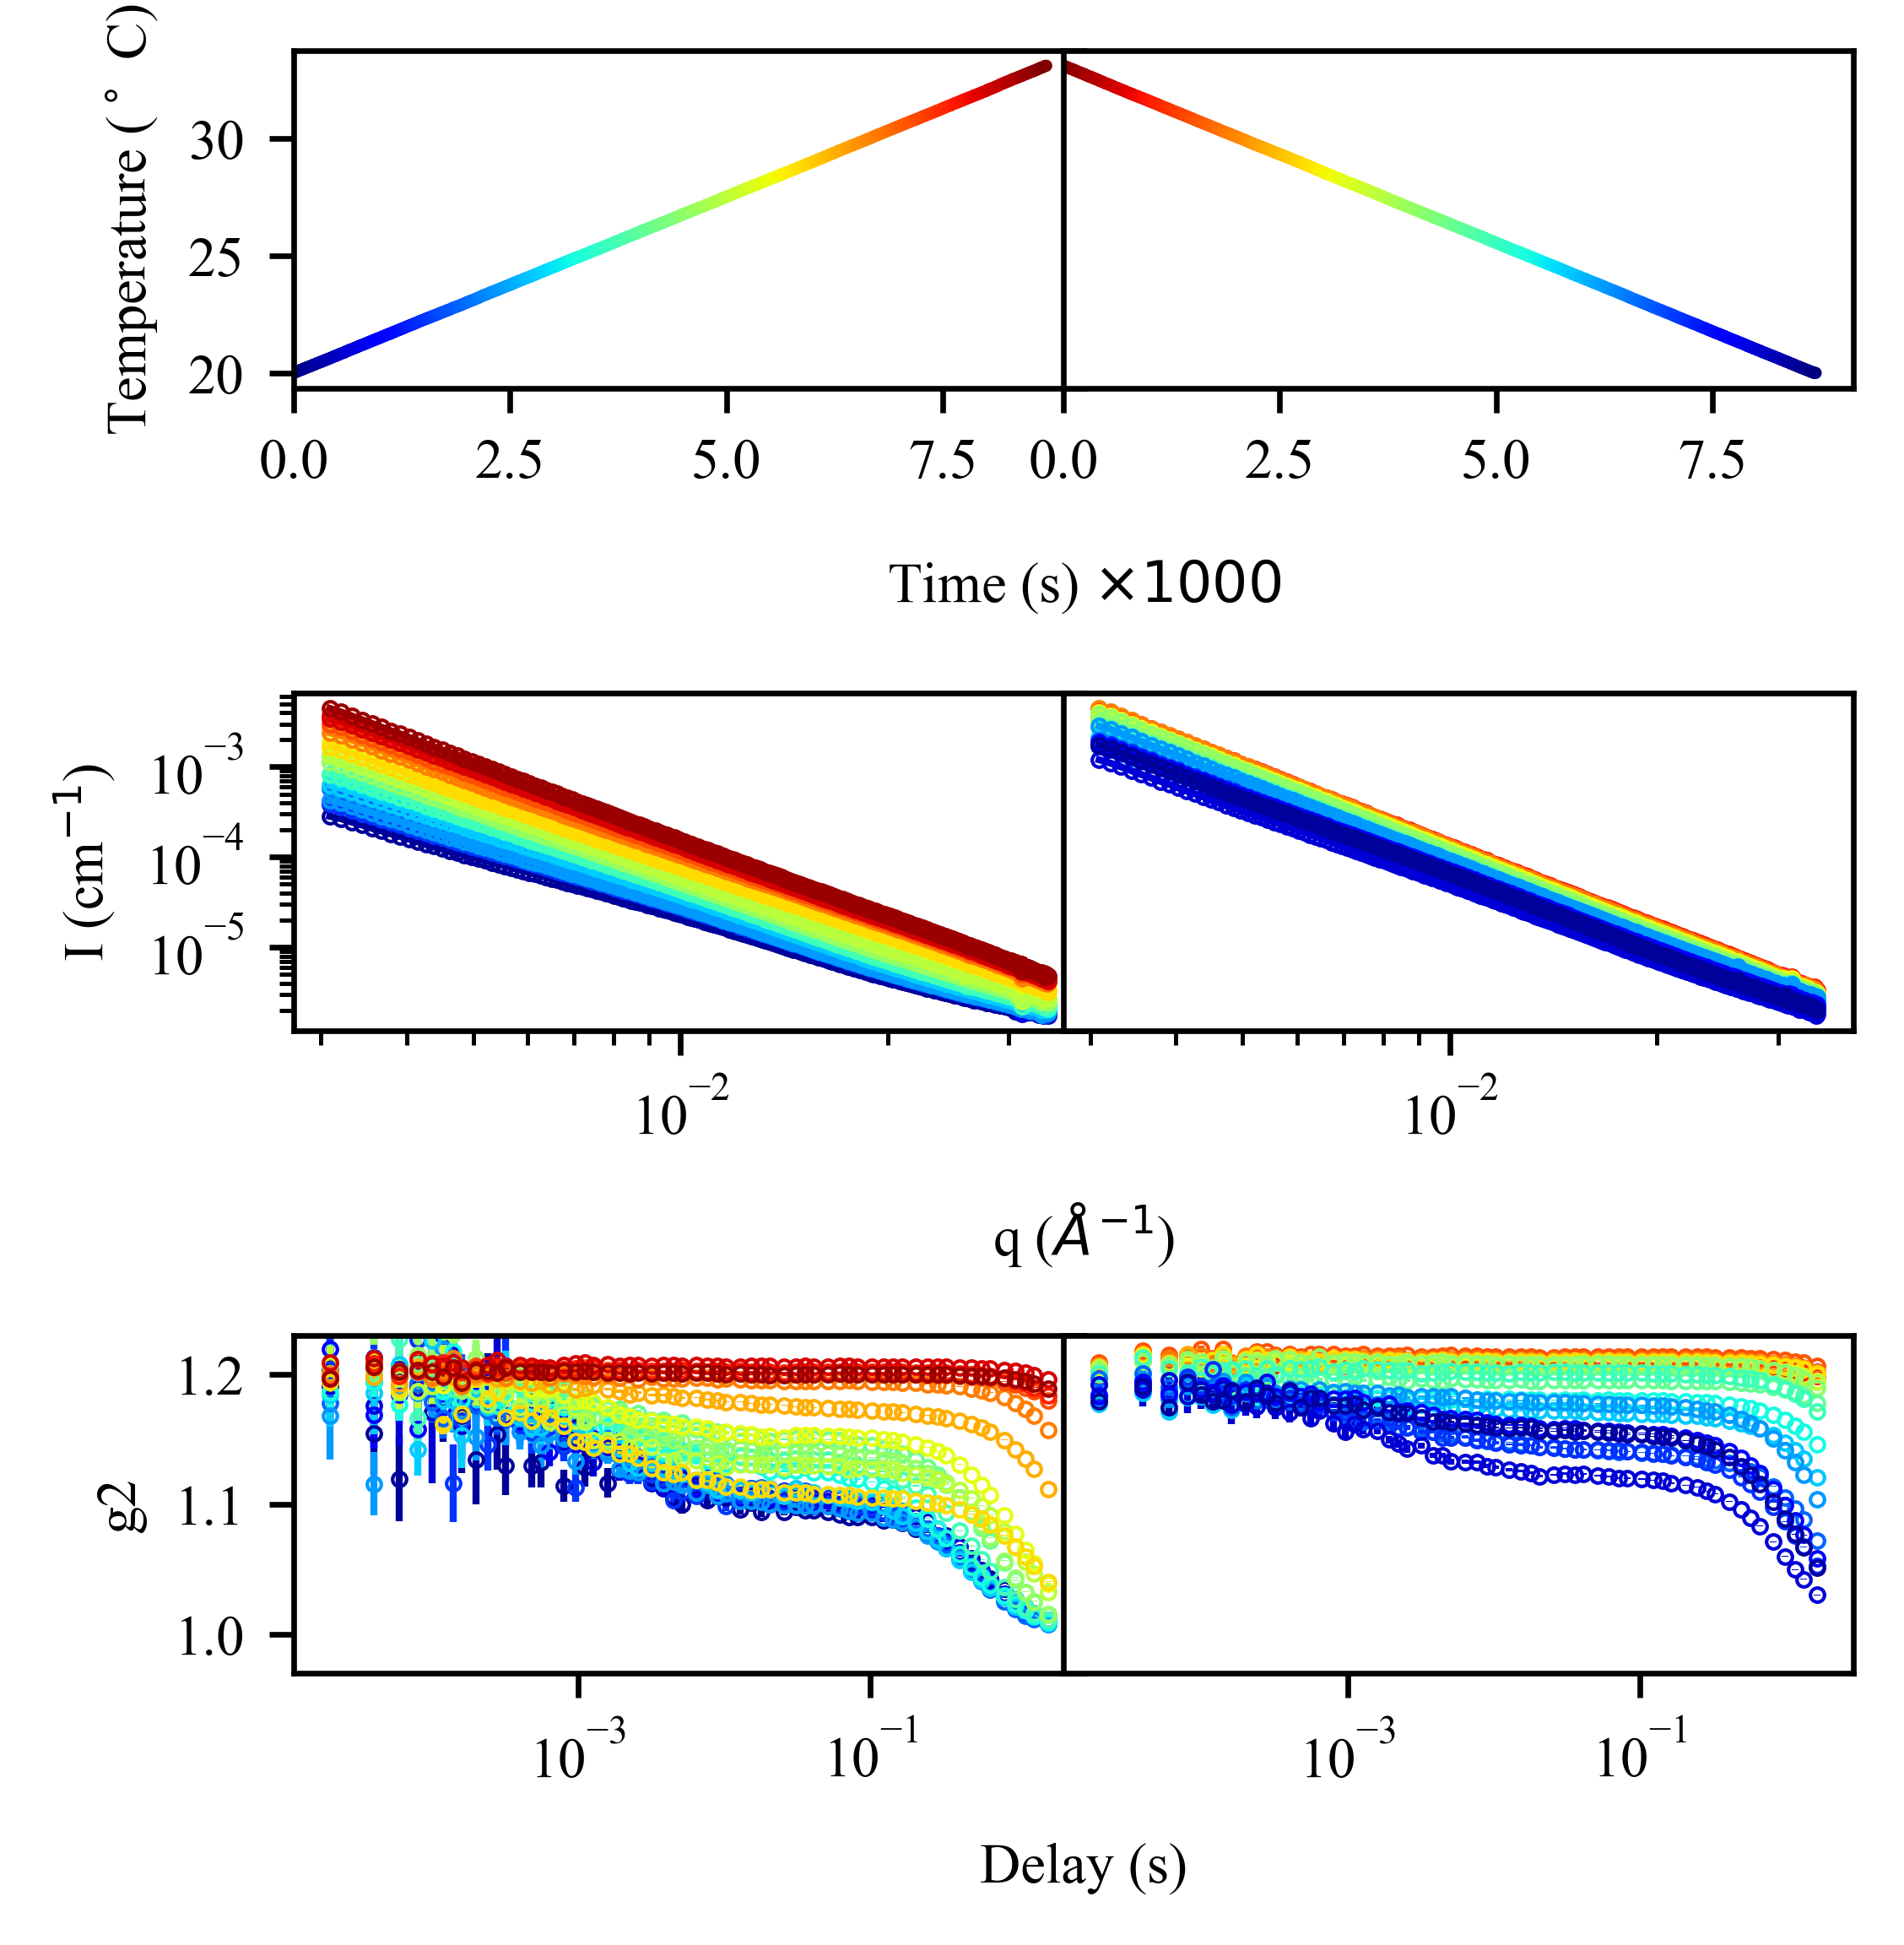

In [5]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600


fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)



def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size
        # print(idx.shape, np.min(idx), np.max(idx))
        # ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'], color=idx, cmap=plt.cm.jet)
        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], c=cmap(idx), s=0.5)

        color = cmap(np.mean(idx))
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o-', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
        # ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        # x, y, yerr=None, xerr=None, fmt='', ecolor=None,
        ax[2].set_ylim(0.97, 1.23)
        
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s) $\\times 1000$')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Delay (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_H05_up)
plot_one_column(ax[:, 1], avg_H05_down, second_column=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('sub_figure6.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()

In [ ]:
avg_039